In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
%pip install pymorphy2
import pymorphy2
from PIL import Image

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('reviews_clean.csv', encoding="utf-8")

In [4]:
data.head()

,Place,Author,Date,Review,Advantages,Disadvantages,Rating
0,Клуб Hot Collection / Хот Коллекшн,Александр Иванов,2023-09-15,"Мне нравится декор и освещение в этом клубе, х...",Не указано,Не указано,5.0
1,Ресторан Birds,Наталия,2023-09-14,Отличное место!!! Все суппер!!! Очень понравил...,Вид из окна,официант САВЧЕНКО ЕГОР ТРЕБОВАЛ В ГРУБОЙ ФОРМЕ...,3.9
2,Клуб Hot Collection / Хот Коллекшн,alasad,2023-09-14,Очень замечательное место с прекрасными видами...,"Очень замечательные услуги, красивые девушки, ...",ничего,5.0
3,Банкетный зал Сосны в отеле Роял Зенит,StasFoodLover,2023-09-13,Классное место! Атмосфера приятная и расслабле...,Общая атмосфера и кухня,Не заметили,5.0
4,Клуб Hot Collection / Хот Коллекшн,"Эмма, Эмма",2023-09-13,"Мне понравилась праздничная атмосфера, веселье...","Веселое место, музыка, энтузиазм и очень прием...",Я не нашел никаких минусов,5.0


In [5]:
data.shape

(12831, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12831 entries, 0 to 12830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place          12831 non-null  object 
 1   Author         12831 non-null  object 
 2   Date           12831 non-null  object 
 3   Review         12831 non-null  object 
 4   Advantages     12831 non-null  object 
 5   Disadvantages  12831 non-null  object 
 6   Rating         12831 non-null  float64
dtypes: float64(1), object(6)
memory usage: 701.8+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data["Place"].value_counts()

Клуб Hot Collection / Хот Коллекшн            311
Ресторан Eshak / Ишак (Рублевка)              211
Ресторан Eshak / Ишак (Одинцово)              206
Ресторан Manana / Манана                      172
Ресторан Sixty / Сиксти                       129
                                             ... 
Ресторан Гольф-Кафе (закрыт)                    1
Ресторан Perfect / Перфект                      1
Ресторан Парус                                  1
Кафе 9 этаж (закрыт)                            1
Ресторан La Marée / Ла Маре (на Проточном)      1
Name: Place, Length: 1585, dtype: int64

In [9]:
data["Rating"].value_counts()

5.0    8800
1.0    1380
4.0     476
2.0     265
4.9     254
3.0     243
4.8     234
4.7     174
4.6     132
4.5     104
4.4      47
2.4      39
2.3      39
1.8      36
2.6      32
1.9      31
2.7      30
4.3      30
3.3      29
3.4      27
4.2      26
1.4      26
2.8      25
1.5      25
2.1      24
2.9      24
2.2      24
1.7      24
3.2      21
1.3      20
4.1      20
3.6      19
3.5      19
3.9      18
3.1      17
0.0      16
1.1      16
1.2      14
2.5      13
3.7      13
3.8      13
1.6      12
Name: Rating, dtype: int64

In [10]:
data = data.drop(data[data['Rating'] <= 0].index)
data["Advantages"] = data["Advantages"].str.replace('Не указано','')
data["Disadvantages"] = data["Disadvantages"].str.replace('Не указано','')
data["Review"] = data["Review"].str.replace('Отзыв отсутствует','').replace('Нет', '').replace('.', '. ')
data['Year'] = data["Date"].dt.year

In [11]:
mean_rating_by_place = data.groupby(['Place'])['Rating'].mean()

In [12]:
def plot_rating_distribution(data, title):
    # Создадим градиент цвета от красного (1) до зеленого (5)
    colors = sns.color_palette("RdYlGn", as_cmap=True)
    width = 20
    height = 15

    sns.set(rc = {'figure.figsize':(width, height)})

    # Инвертируем порядок данных
    inverted_data = data.iloc[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(inverted_data.index, inverted_data.values, color=colors((inverted_data.values - 1) / 5))  # Нормализуем значения до диапазона [0, 1]
    plt.title(title)
    plt.xlabel('Рейтинг')
    plt.ylabel('Ресторан')
    plt.xlim(0, 5)
    plt.show()

In [13]:
group_by_place = data.groupby(['Place'])
restaurants_all_time = group_by_place.aggregate(['mean', 'count'])["Rating"]

In [14]:
restaurants_all_time.head()

,mean,count
Place,,
CITY FOOD Европолис,4.900000,4
Lavocado,2.300000,1
Pizza&Coffee Rustic / Пицца и Кофе Рустик (закрыт),5.000000,2
Бали (Большая Дмитровка) закрыт,1.000000,1
Банкетный зал Art Moscow,4.992857,14


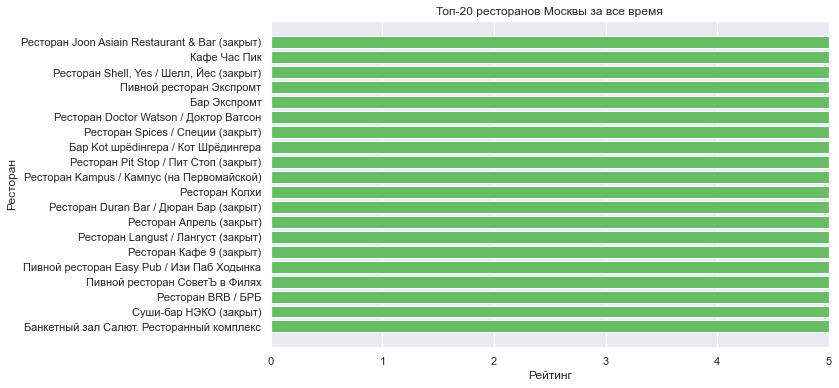

In [15]:
top_20_best = restaurants_all_time.sort_values(['mean', 'count'], ascending=[False, False])['mean'][:20]
plot_rating_distribution(top_20_best, "Топ-20 ресторанов Москвы за все время")

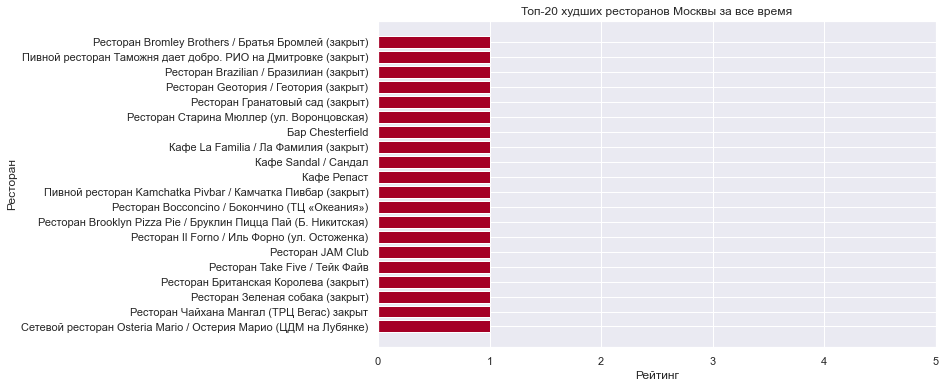

In [16]:
top_20_worst = restaurants_all_time.sort_values(['mean', 'count'], ascending=[True, False])['mean'][:20]

plot_rating_distribution(top_20_worst, 'Топ-20 худших ресторанов Москвы за все время')


In [17]:
restaurants_2022_ranking = data[data["Year"] == 2022].groupby(['Place']).aggregate(['mean', 'count'])["Rating"]

In [18]:
restaurants_all_time.head()

,mean,count
Place,,
CITY FOOD Европолис,4.900000,4
Lavocado,2.300000,1
Pizza&Coffee Rustic / Пицца и Кофе Рустик (закрыт),5.000000,2
Бали (Большая Дмитровка) закрыт,1.000000,1
Банкетный зал Art Moscow,4.992857,14


In [19]:
top_20_2022 = restaurants_2022_ranking.sort_values(['mean', 'count'], ascending=[False, False])['mean'][:20]

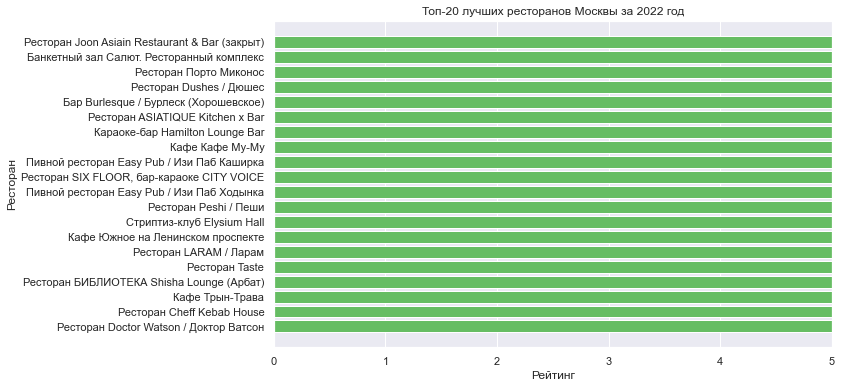

In [20]:
plot_rating_distribution(top_20_2022, 'Топ-20 лучших ресторанов Москвы за 2022 год')

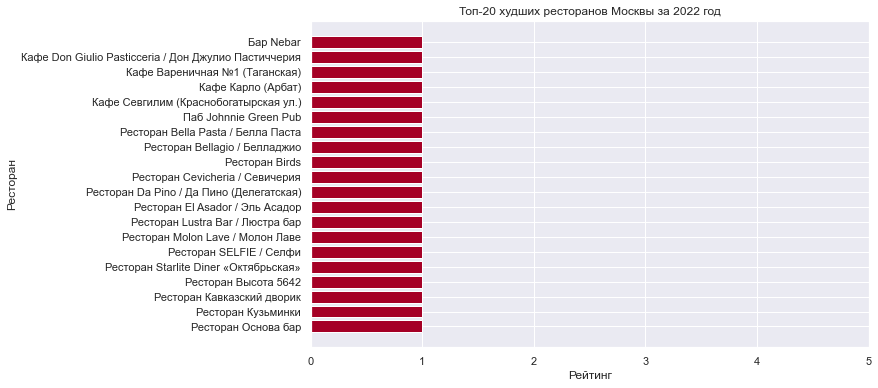

In [21]:
plot_rating_distribution(restaurants_2022_ranking.sort_values(['mean', 'count'], ascending=[True, False])['mean'][:20], 'Топ-20 худших ресторанов Москвы за 2022 год')

In [22]:
restaurants_2022_ranking.sort_values(['mean', 'count'], ascending=[True, False])[:5]

,mean,count
Place,,
Бар Nebar,1.0,1
Кафе Don Giulio Pasticceria / Дон Джулио Пастиччерия,1.0,1
Кафе Вареничная №1 (Таганская),1.0,1
Кафе Карло (Арбат),1.0,1
Кафе Севгилим (Краснобогатырская ул.),1.0,1


In [23]:
data[data['Place'] == 'Бар Nebar']

,Place,Author,Date,Review,Advantages,Disadvantages,Rating,Year
710,Бар Nebar,Ольга,2022-12-27,Отвратительное место! Обманывают! В счет включ...,Их нет!,"Грязные прожженые диваны, грязные неработающие...",1.0,2022


In [24]:
group_by_place['Year'].apply(list)

Place
CITY FOOD Европолис                                                            [2021, 2021, 2021, 2021]
Lavocado                                                                                         [2023]
Pizza&Coffee Rustic / Пицца и Кофе Рустик (закрыт)                                         [2017, 2017]
Бали (Большая Дмитровка) закрыт                                                                  [2019]
Банкетный зал Art Moscow                              [2021, 2021, 2021, 2021, 2021, 2021, 2021, 202...
                                                                            ...                        
Чайхана Урюк (Вавилова)                                                                    [2021, 2017]
Чайхана Урюк (Павелецкая)                                                            [2022, 2019, 2019]
Чайхана Урюк (Профсоюзная) закрыт                                                          [2019, 2019]
Чайхана Урюк (Семеновская)                                

In [25]:
data[data["Place"] == "Кафе Кафе Му-Му"].groupby(['Year']).mean()

,Rating
Year,
2016,5.000000
2017,4.714286
2018,5.000000
2019,4.870968
2020,3.970000
2022,5.000000
2023,5.000000


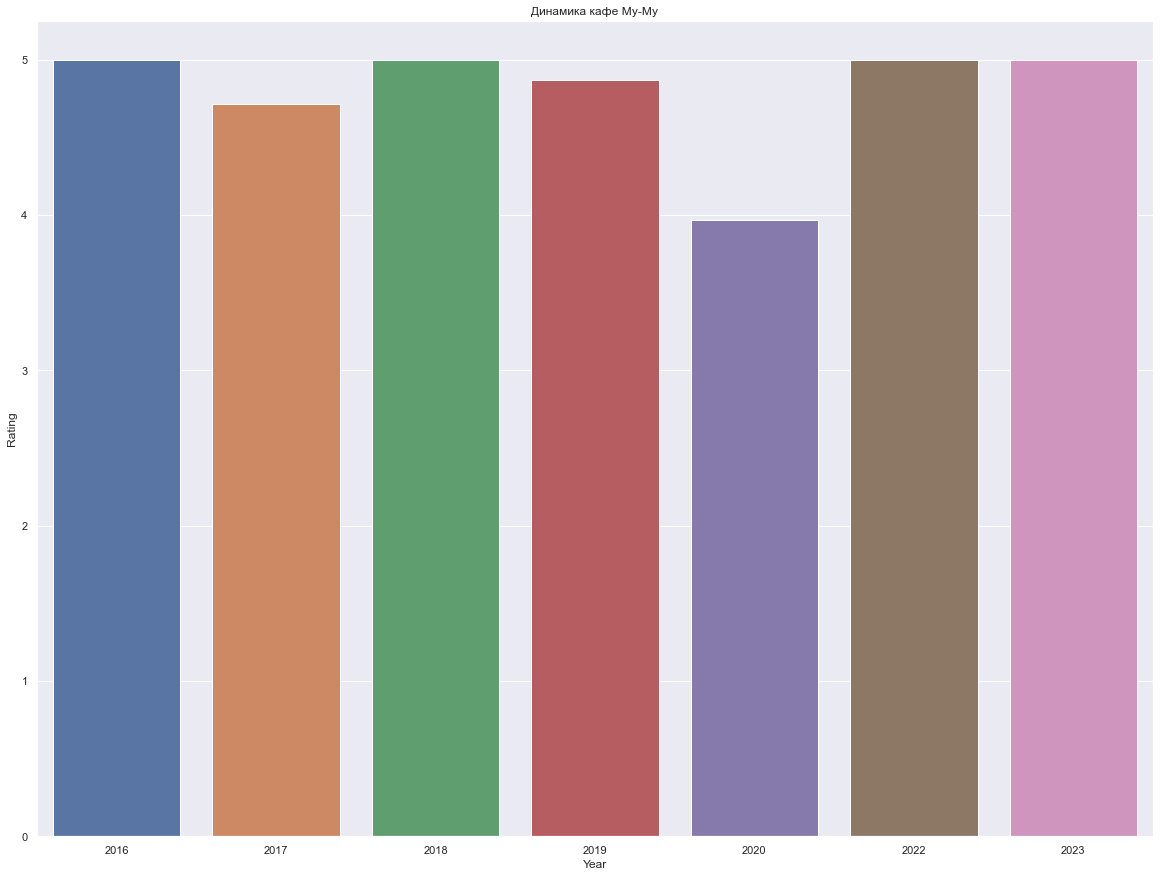

In [26]:
rating_dynamic_good_restaurant = data[data["Place"] == "Кафе Кафе Му-Му"].groupby(['Year']).mean()

chart = sns.barplot(x = rating_dynamic_good_restaurant.index, y = 'Rating', data = rating_dynamic_good_restaurant, orient="v")
plt.title('Динамика кафе Му-Му')
plt.show()

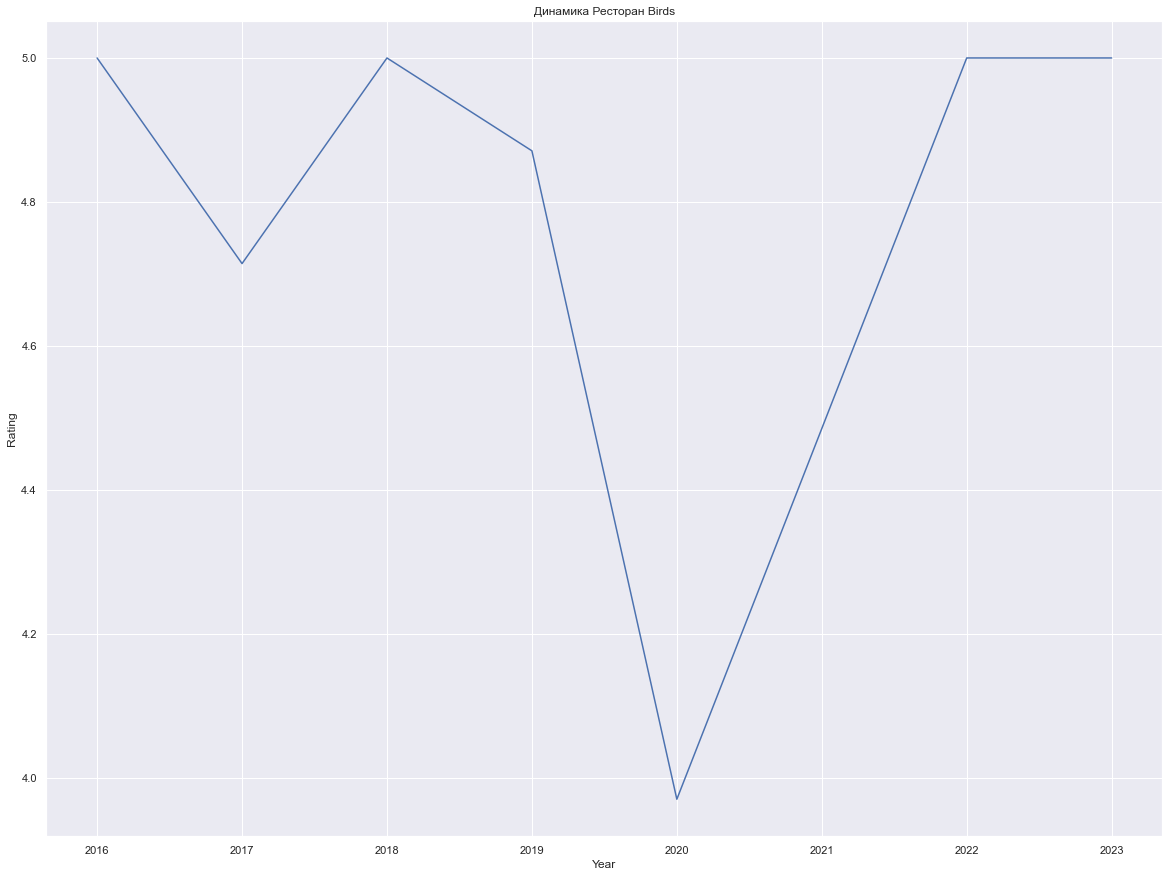

In [27]:
chart = sns.lineplot(x = rating_dynamic_good_restaurant.index, y = 'Rating', data = rating_dynamic_good_restaurant)
plt.title('Динамика Ресторан Birds')
plt.show()

In [28]:
dynamic_bad_restaurant = data[data["Place"] == "Ресторан Birds"].groupby(['Year']).mean()
dynamic_bad_restaurant


,Rating
Year,
2019,2.2
2020,2.8
2021,2.1
2022,1.0
2023,3.9


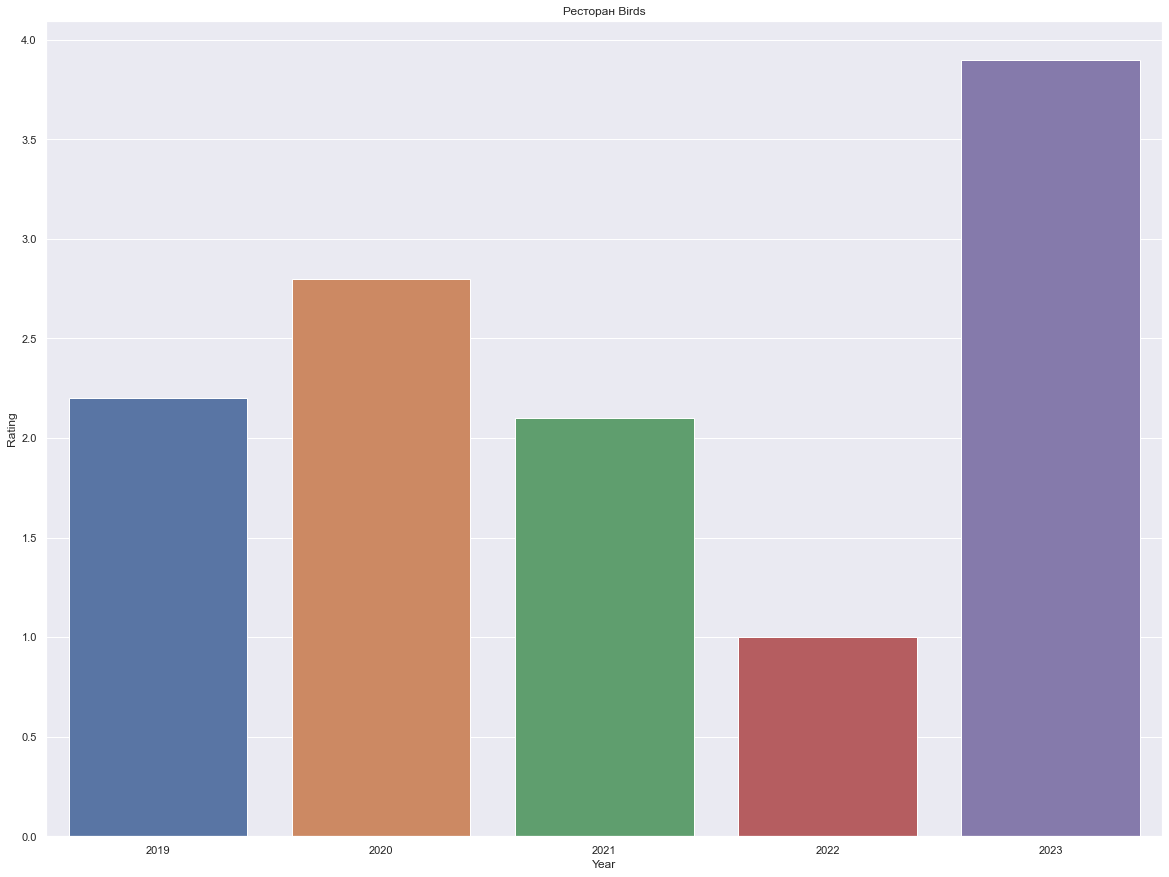

In [29]:
chart = sns.barplot(x = dynamic_bad_restaurant.index, y = 'Rating', data = dynamic_bad_restaurant, orient="v")
plt.title('Ресторан Birds')
plt.show()

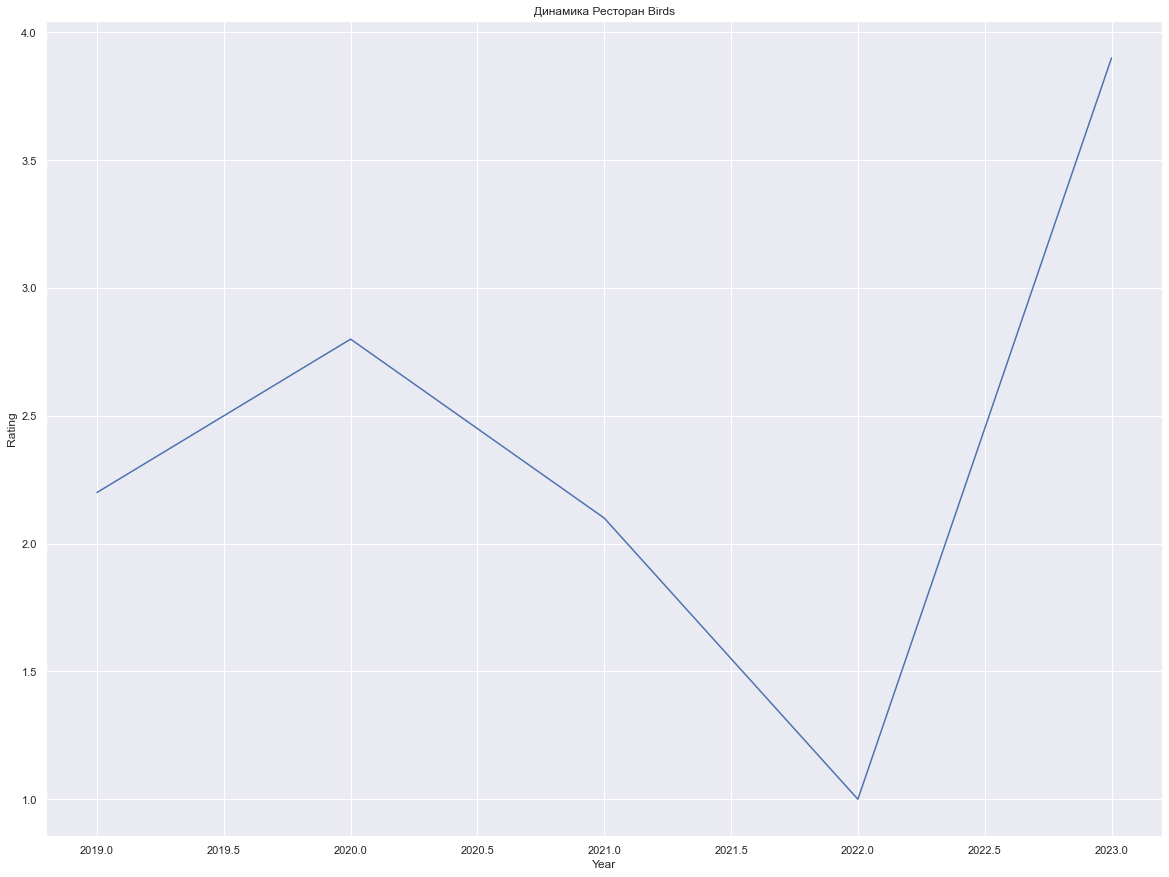

In [30]:
chart = sns.lineplot(x = dynamic_bad_restaurant.index, y = 'Rating', data = dynamic_bad_restaurant)
plt.title('Динамика Ресторан Birds')
plt.show()

In [31]:
reviews_by_place = group_by_place['Review'].apply(list)

In [32]:
def make_text(indexes):
    words = []
    for review in reviews_by_place[indexes]:
        words.extend(review)
    text = ' '.join(words).replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('\n', ' ').replace('\r', ' ')
    return text

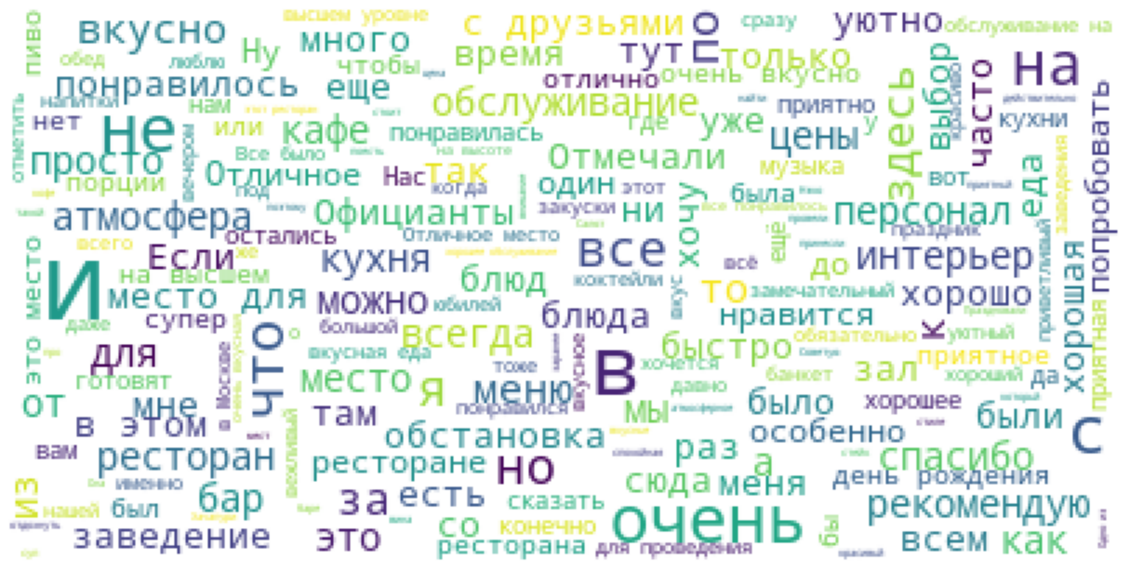

In [33]:
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(make_text(top_20_best.index))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

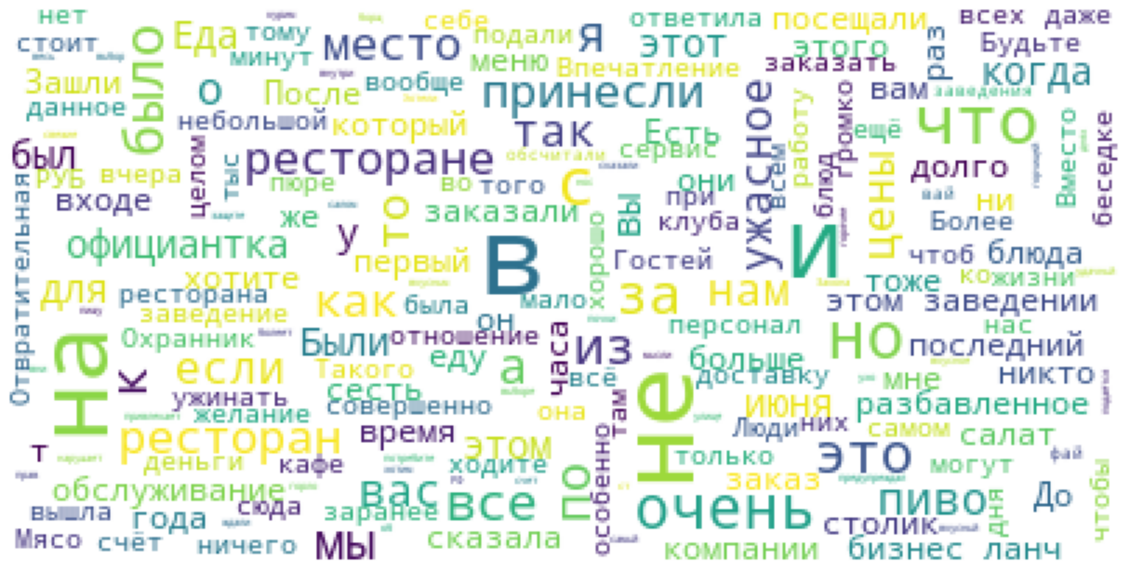

In [34]:
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(make_text(top_20_worst.index))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

In [35]:
morph = pymorphy2.MorphAnalyzer(lang='ru')

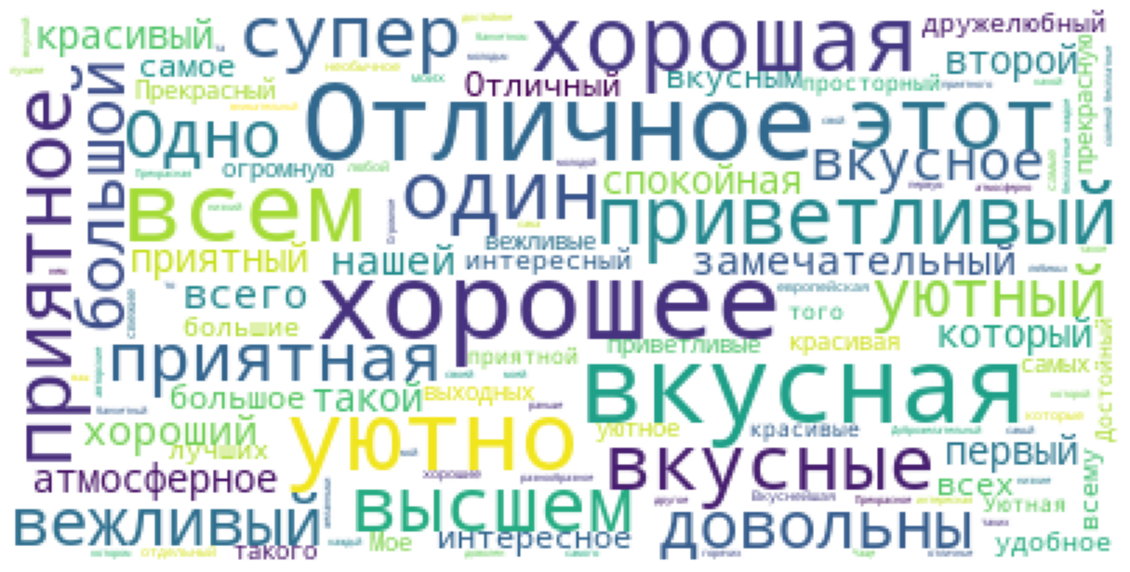

In [36]:
best_rest_text_raw = " ".join(data[data["Place"].isin(top_20_best.index)]["Review"])
res_text = ""
for el in best_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    if 'ADJF' in morph.parse(morph.parse(splitted_word[i])[0].normal_form)[0].tag:
      res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

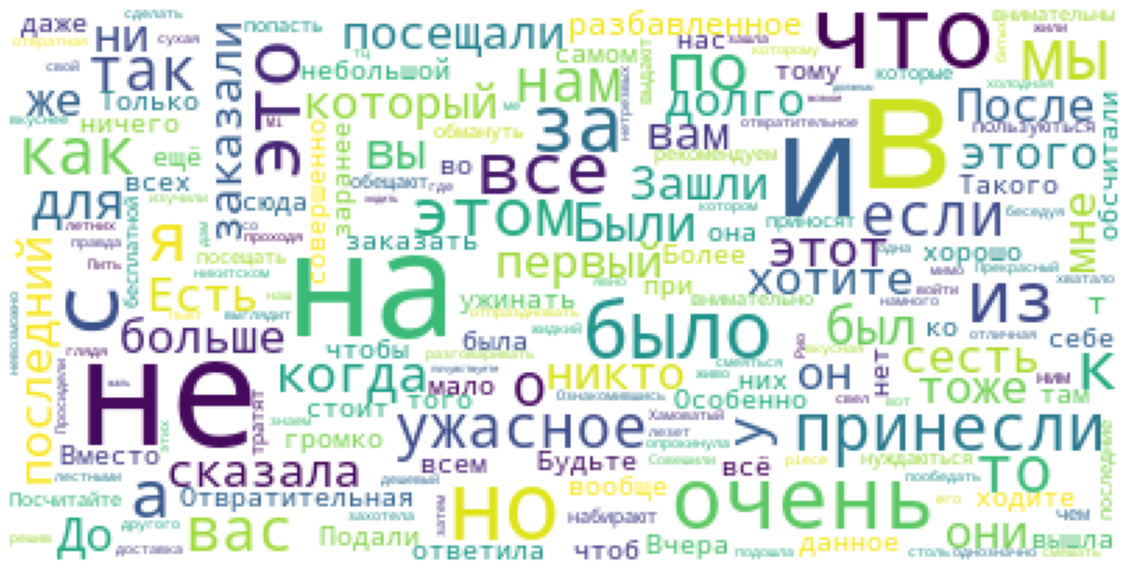

In [37]:
worst_rest_text_raw = " ".join(data[data["Place"].isin(top_20_worst.index)]["Review"])
res_text = ""
for el in worst_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    if 'NOUN' not in morph.parse(morph.parse(splitted_word[i])[0].normal_form)[0].tag:
      res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=60, relative_scaling=.5).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.show()

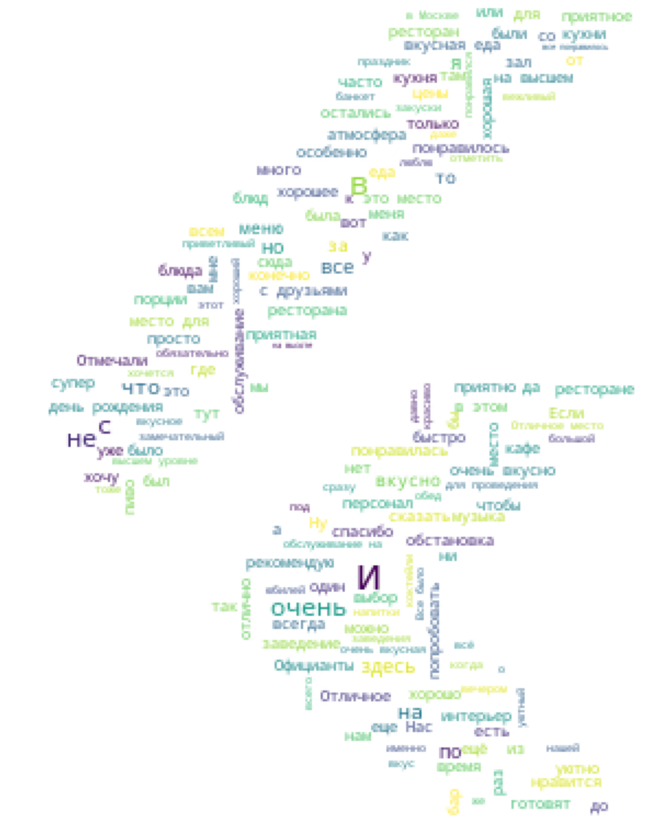

In [38]:
mask = np.array(Image.open("image.png"))
best_rest_text_raw = " ".join(data[data["Place"].isin(top_20_best.index)]["Review"])
res_text = ""
for el in best_rest_text_raw.split():
  res_word = el.replace('.', ' ').replace('!', ' ').replace(',', ' ').replace('.', '').replace('!', '').replace(',', '')
  splitted_word = res_word.split()
  for i in range(len(splitted_word)):
    res_text += splitted_word[i] + ' '
wordcloud = WordCloud(background_color="white", max_font_size=20, relative_scaling=.5, mask=mask).generate(res_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
data["review_length"] = data.apply(lambda row: len(str(row['Review'])), axis = 1)

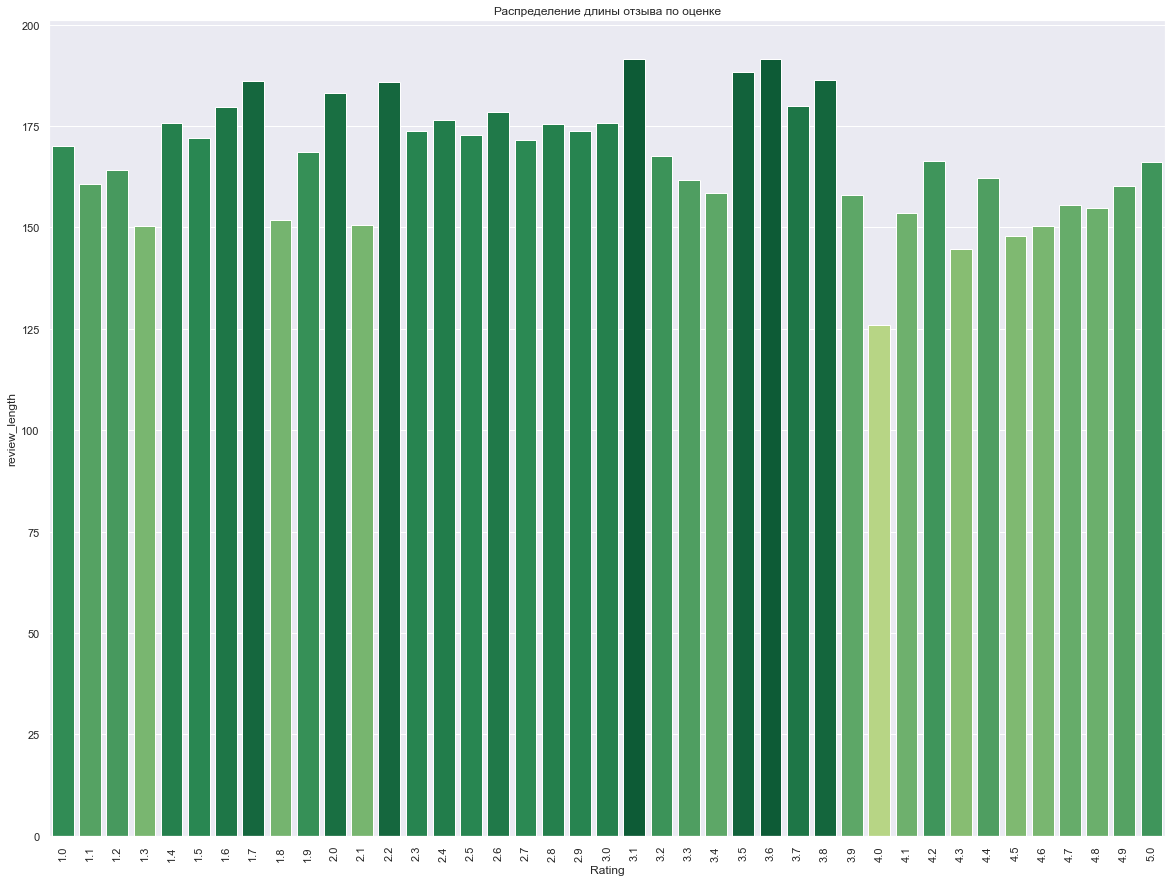

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame data и 'Rating' и 'review_length' - это его столбцы

# Группировка по оценке и вычисление средней длины отзыва
len_by_rating = data.groupby(['Rating'])['review_length'].mean()

# Создание цветовой карты от красного до зеленого
colors = plt.cm.RdYlGn(len_by_rating / float(max(len_by_rating)))

# Создание barplot с указанием параметра color
chart = sns.barplot(x=len_by_rating.index, y=len_by_rating, orient="v", palette=colors)

# Поворот меток по x для лучшей читаемости
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Распределение длины отзыва по оценке')
plt.show()
